# Eshan Shakrani - 112802596

### Import Libraries

In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image 
from scipy import ndimage 

### Load Data

In [25]:
train_data = h5py.File('data/train_catvnoncat.h5')
test_data =  h5py.File('data/test_catvnoncat.h5') 

print('Keys to access portions of the training data:')
print(train_data.keys())
print()

print(train_data['train_set_x'])
print(train_data['train_set_y'])
print(train_data['list_classes'])

print()
print()
print('Keys to access portions of the testing data:')
print(test_data.keys())
print()

print(test_data['test_set_x'])
print(test_data['test_set_y'])
print(test_data['list_classes'])

Keys to access portions of the training data:
<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>

<HDF5 dataset "train_set_x": shape (209, 64, 64, 3), type "|u1">
<HDF5 dataset "train_set_y": shape (209,), type "<i8">
<HDF5 dataset "list_classes": shape (2,), type "|S7">


Keys to access portions of the testing data:
<KeysViewHDF5 ['list_classes', 'test_set_x', 'test_set_y']>

<HDF5 dataset "test_set_x": shape (50, 64, 64, 3), type "|u1">
<HDF5 dataset "test_set_y": shape (50,), type "<i8">
<HDF5 dataset "list_classes": shape (2,), type "|S7">


In [39]:
print('Possible labels for each sample:')
for label in train_data['list_classes']:
    print('\t-', label)

Possible labels for each sample:
	- b'non-cat'
	- b'cat'


##### Training data:  
Input - 209 samples of size (64, 64, 3) \
    -> each sample is an image with height = width = 64 pixels; 3 color channels (RGB) \
    \
Output - vector of size (209, 1): a label for each of the samples \
    -> possible labels: 'non-cat' or 'cat'

##### Testing data:
Input - 50 samples of size (64, 64, 3) \
Output - vector of size (50, 1): label for each of the samples

### Separate Data into Features and Labels

In [51]:
# break up training data
X_train = train_data['train_set_x'][:]
Y_train = train_data['train_set_y'][:]

# break up testing data
X_test = test_data['test_set_x'][:]
Y_test = test_data['test_set_y'][:]

# extract the list of possible labels
labels = train_data['list_classes'][:]

### Visualize Images 

##### Images in Training set:

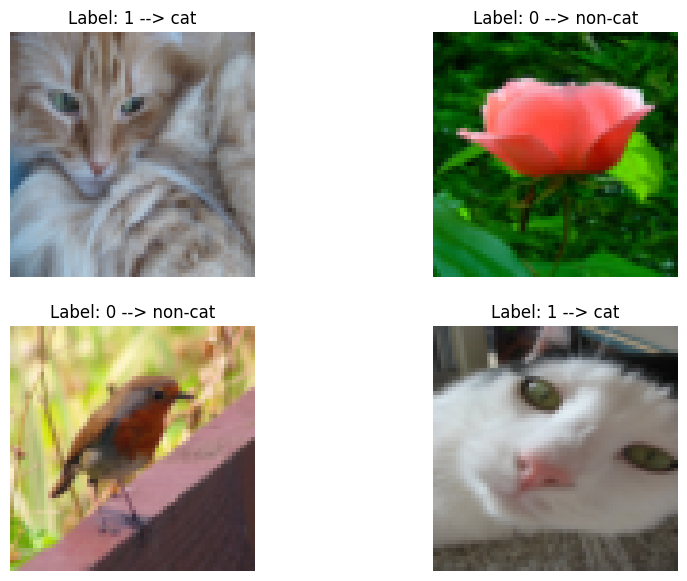

In [112]:
# pick 4 indices for images to show from the training set
indices = [2, 3, 10, 14]

# create figure
fig = plt.figure(figsize = (10, 7))

# define # of rows / columns
rows = 2
cols = 2

subplot_index = 1
for ind in indices:
    fig.add_subplot(rows, cols, subplot_index)
    subplot_index += 1
    plt.imshow(X_train[ind])
    plt.axis('off')

    # craft the title string for each picture 
    label_int = Y_train[ind]
    label_str = labels[label_int].decode('utf-8')
    title = f'Label: {label_int} --> {label_str}'
    plt.title(title)

##### Images in Testing set:

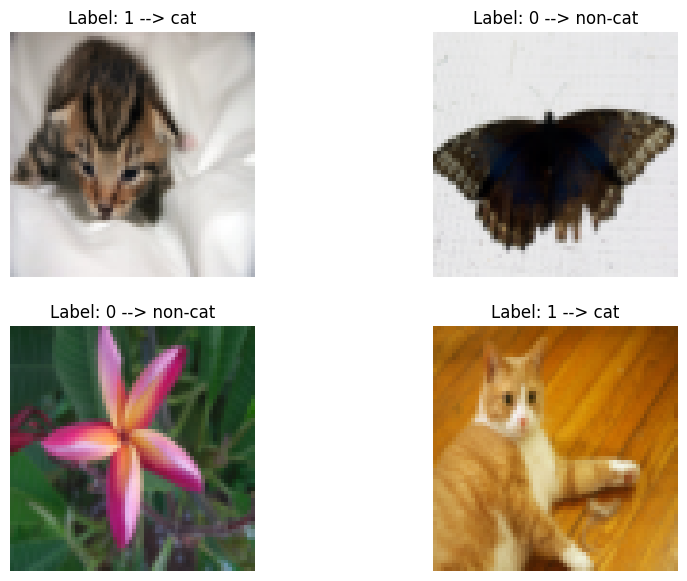

In [113]:
# pick 4 indices for images to show from the testing set
indices = [1, 13, 16, 19]

# create figure
fig = plt.figure(figsize = (10, 7))

# define # of rows / columns
rows = 2
cols = 2

subplot_index = 1
for ind in indices:
    fig.add_subplot(rows, cols, subplot_index)
    subplot_index += 1
    plt.imshow(X_test[ind])
    plt.axis('off')

    # craft the title string for each picture 
    label_int = Y_test[ind]
    label_str = labels[label_int].decode('utf-8')
    title = f'Label: {label_int} --> {label_str}'
    plt.title(title)